<a href="https://colab.research.google.com/github/AdamMcCloskey381/Udemy-ML/blob/main/Polynomial_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
np.random.seed(42)
np.set_printoptions(precision = 6, suppress = True)

In [79]:
### model regresji liniowej
x = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(40)
y = -x**3 + 10*x**2 - 2*x + 3 + noise 

In [80]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y = y.reshape(40, 1)
x = x.reshape(40, 1)
lr.fit(x, y)

LinearRegression()

In [82]:
pred = lr.predict(x)
from sklearn.metrics import r2_score
r2_score(y, pred)

0.5342822962632471

In [85]:
df = pd.DataFrame(data = {"x": x.ravel()})

In [87]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures()

In [94]:
x_pf = pf.fit_transform(df)
df_pf = pd.DataFrame(data = x_pf,
                     columns = ["1", "x", "X^2"])

In [109]:
lr_poly = LinearRegression()
lr_poly.fit(df_pf, y)
y_pred2 = lr_poly.predict(df_pf)
r2_score(y, y_pred2)

0.8951163003458433

In [128]:
poly_3 = PolynomialFeatures(degree = 3)
x_pf_3 = poly_3.fit_transform(x)
df_x_pf_3 = pd.DataFrame(data = x_pf_3,
                         columns = ["1", "x", "x^2", "x^3"])

In [136]:
lr_poly_3 = LinearRegression()
lr_poly_3.fit(df_x_pf_3, y)
y_pred_3 = lr_poly_3.predict(df_x_pf_3) 
r2_score(y, y_pred_3)

0.9841708613657418

Text(0.5, 1.0, 'graph')

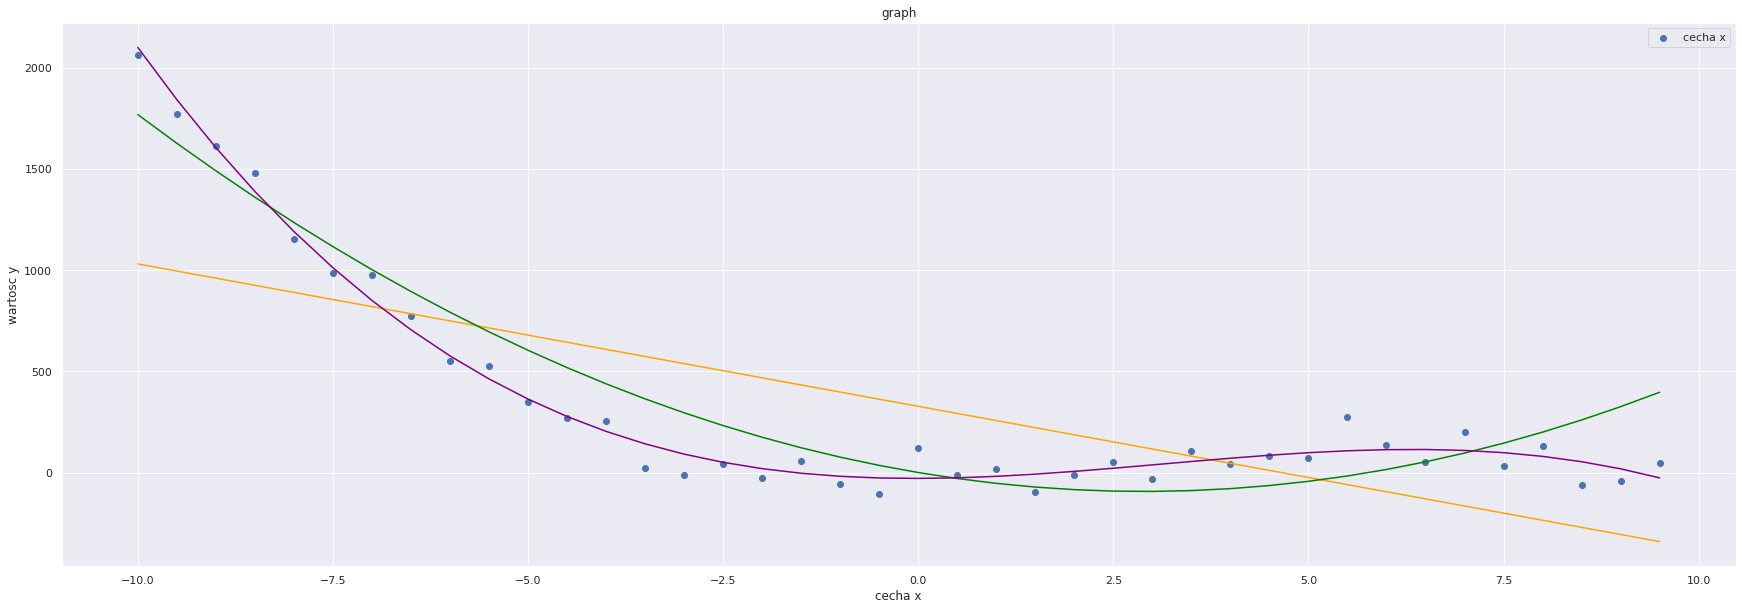

In [135]:
sns.set()
fig = plt.figure(figsize = (30, 10))
plt.scatter(x, y, label = "cecha x")

plt.plot(x, x*lr.coef_ + lr.intercept_, c = "orange")
plt.plot(x, x**2*lr_poly.coef_[0][2] + x*lr_poly.coef_[0][1] + lr_poly.coef_[0][0], c = "green")
plt.plot(x, y_pred_3, c = "purple")

plt.xlabel("cecha x")
plt.ylabel("wartosc y")
plt.legend()
plt.title("graph")

In [137]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [159]:
# y_pred_3
l = np.array([mae(y, pred), mse(y, pred), r2_score(y, pred)])
l1 = np.array([mae(y, y_pred_3), mse(y, y_pred_3), r2_score(y, y_pred_3)])
ls = np.r_[l, l1]

df = pd.DataFrame(data = np.r_[l, l1].reshape(2, 3),
                  columns = ["MAE", "MSE", "R2"])

In [162]:
### visualising using plotly.express

fig = px.bar(df, df["MAE"])
#fig.show()